In [1]:
import numpy as np #主要實做 PLA 模型
import pandas as pd   #對資料進行讀檔、整理
import seaborn as sns   #資料視覺化

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
#Sex
train_data.loc[train_data["Sex"] == "male" , "Sex"] = 0
train_data.loc[train_data["Sex"] == "female" , "Sex"] = 1

test_data.loc[test_data["Sex"] == "male" , "Sex"] = 0
test_data.loc[test_data["Sex"] == "female" , "Sex"] = 1
#male = 0 ,female = 1

In [7]:
#Age
train_data["Age"] = train_data["Age"].fillna(test_data["Age"].mean())
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].mean())
#NaN = Age.mean()

In [8]:
#Fare
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].mean())
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].mean())
#NaN = Fare.mean()

In [9]:
#Embark
train_data["Embarked"] = train_data["Embarked"].fillna("S")
test_data["Embarked"] = train_data["Embarked"].fillna("S")

train_data.loc[train_data["Embarked"] == "S" , "Embarked"] = -1
train_data.loc[train_data["Embarked"] == "C" , "Embarked"] = 0
train_data.loc[train_data["Embarked"] == "Q" , "Embarked"] = 1

test_data.loc[test_data["Embarked"] == "S" , "Embarked"] = -1
test_data.loc[test_data["Embarked"] == "C" , "Embarked"] = 0
test_data.loc[test_data["Embarked"] == "Q" , "Embarked"] = 1
#S = 0 ,C = 1 ,Q = 2

In [10]:
train_data.loc[train_data["Survived"] == 0 , "Survived"] = -1

In [11]:
train = np.array(train_data.values)
test = np.array(test_data.values)

In [12]:
dataset = np.zeros((891,6))
#Pclass ,Sex ,Age ,Fare ,Embark

In [13]:
dataset[:,0] = train[:,2]   # x0 = Pclass
dataset[:,1] = train[:,4]   # x1 = Sex
dataset[:,2] = train[:,5]   # x2 = Age
dataset[:,3] = train[:,9]   # x3 = Fare
dataset[:,4] = train[:,11]  # x4 = Embark
dataset[:,5] = train[:,1]   # x5 = survived

In [14]:
def PLA(data):
    w = np.zeros(6)
    for j in range(0 , 5000):
        for i in range(0 , len(dataset)):
            x = data[i,:]
            y = w.T.dot(x)   #@ = dot
            if np.sign(y) == (data[i , 5]):
                continue
            else:
                w = w + x*(data[i , 5])
                break
    return w

In [15]:
weight = PLA(dataset)

In [16]:
test_dataset = np.zeros((418 , 6))

In [17]:
test_dataset[:,0] = test[:,1]   #Pclass
test_dataset[:,1] = test[:,3]   #Sex
test_dataset[:,2] = test[:,4]   #Age
test_dataset[:,3] = test[:,8]   #Fare
test_dataset[:,4] = test[:,10]  #Embarked

In [18]:
def test_PLA(data):
    for i in range(0 , len(data)):
        x = data[i,:]
        data[i,5] = np.sign(weight.T.dot(x))
    

In [19]:
test_PLA(test_dataset)

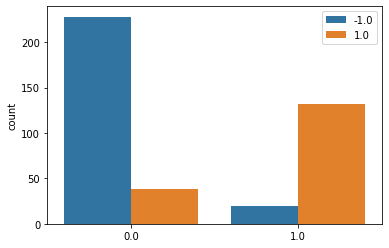

In [20]:
sns.countplot(test_dataset[:,1],hue = test_dataset[:,5])

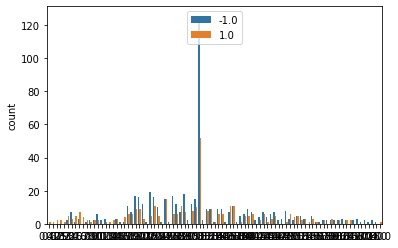

In [21]:
sns.countplot(dataset[:,2],hue = dataset[:,5])

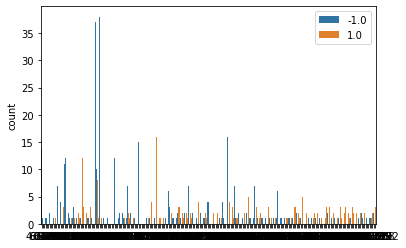

In [22]:
sns.countplot(dataset[:,3],hue = dataset[:,5])

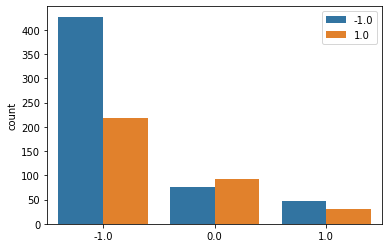

In [23]:
sns.countplot(dataset[:,4],hue = dataset[:,5])